# Problema 2 (tema 4)

Demostrar que existe el siguiente problema de valor inicial está bien planteado (es decir, tiene una única solución):
\begin{align*}
      &y'=y(y-x)(y-2), \quad x\in[0,3],\\
      &y(0)=1.
\end{align*}

Aproximar la solución con $h=0.2$ usando el método de Euler mejorado y comparar con la solución aproximada que proporciona la función `odeint` de Python. Calcular la diferencia, en norma infinito, entre ambas aproximaciones.

### 1.- Buen planteamiento del problema

Sea $y(x)$ la solución maximal del problema anterior. Tenemos que ver que está definida en todo $[0,3]$, es decir, que no "explota" antes de llegar a $x=3$. O sea, que $y(x)$ está acotada en todo $[0,3]$.

1) Sea $y_1(x)$ la solución del siguiente problema (en el que varía sólo el dato inicial)
>\begin{align*}
      &y'=y(y-x)(y-2), \quad x\in[0,3],\\
      &y(0)=0.
\end{align*}

Es muy fácil comprobar que esta solución es $y_1(x)=0$, definida en todo $[0,3]$.

Como $y_1(0)=0 < 1=y(0)$, entonces $0=y_1(x) < y(x)$ para todo $x\in[0,3]$. Por tanto, $y(x)$ está acotada inferiormente.

2) Sea ahora $y_2(x)$ la solución del siguiente problema (en el que varía sólo el dato inicial)
>\begin{align*}
      &y'=y(y-x)(y-2), \quad x\in[0,3],\\
      &y(0)=2.
\end{align*}

Es muy fácil comprobar que esta solución es $y_2(x)=2$, definida en todo $[0,3]$.

Como $y(0)=1 < 2 = y_2(0)$, entonces $y(x) < y_2(x)=2$ para todo $x\in[0,3]$. Por tanto, $y(x)$ está acotada, luego la única solución maximal está definida en todo $[0,3]$.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 2.- Aproximación mediante `odeint`

In [3]:
def f(x,y): return y*(y-x)*(y-2)
y_a = 1
a, b = 0, 3
h = 0.2

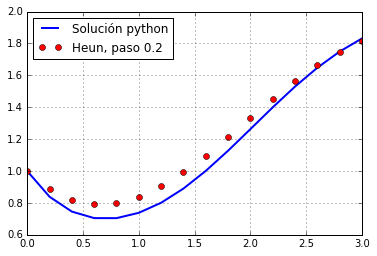

In [5]:
def heun(f, y_a, a, b, h):
    """Calcula la solución de y'=f(t,y) mediante el mét. Euler Mejorado"""
    N = int( round((b-a)/h) )
    
    soporte = linspace(a, b, N+1)
    sol = [y_a]
    yn = y_a
    for i in range(N): # i = 0, 1, ..., N-1
        tn = soporte[i]
        t1 = soporte[i+1]
        k1 = yn + h*f(tn, yn)
        yn1 = yn + h*f(t1,k1)
        sol.append(yn1)
        yn = yn1 # Actualizo yn para próxima iteración
    return soporte, sol

soporte, sol_heun = heun(f, y_a, a, b, h)

# solución mediante python
from scipy.integrate import odeint
def func(y, t): return f(t, y)
sol_python = odeint(func, y_a, soporte)

plot(soporte, sol_python, lw=2, label=u'Solución python')
plot(soporte, sol_heun, 'o',  c='red',  label='Heun, paso ' + str(h))
legend(loc='best')
grid()

### 3.- Norma infinito de la diferencia

La solución aproximada, sol_heun, es una lista (porque así lo hemos programado):

In [7]:
sol_heun

[1,
 0.88480000000000003,
 0.8192511801103286,
 0.79351758149621687,
 0.80170832455879459,
 0.83986520002179954,
 0.90455748343025866,
 0.99181701124230981,
 1.0965592722910085,
 1.2126446453909512,
 1.3334375448659535,
 1.4524947812593221,
 1.5641123170055256,
 1.6637142989828819,
 1.7481824798476657,
 1.8161292207122852]

Pero la solución de Python, sol_python, es una matriz columna (porque así está progamada la función `odeint`):

In [16]:
sol_python

array([[ 1.        ],
       [ 0.83880204],
       [ 0.74564325],
       [ 0.70471703],
       [ 0.70443674],
       [ 0.7378997 ],
       [ 0.80091485],
       [ 0.88998022],
       [ 1.00077583],
       [ 1.12746306],
       [ 1.26288683],
       [ 1.39939923],
       [ 1.52979336],
       [ 1.64799403],
       [ 1.74948472],
       [ 1.83161023]])

Para poder restar estos dos objetos, los convertiremos en arrays 1-dimensionales (vectores).

In [21]:
# a) Convertimos la lista 'sol_euler_mejorado' en un array
array_sol_em = array(sol_euler_mejorado)

# b) Hacemos lo mismo con la matriz columna 
matriz_fila = sol_python.transpose() # Trasponemos la matriz columna
array_sol_py = matriz_fila[0] # Extraemos la primera (y única) fila de la matriz

# Ahora podemos restar las dos
array_sol_em - array_sol_py

array([ 0.        ,  0.04599796,  0.07360793,  0.08880056,  0.09727159,
        0.1019655 ,  0.10364263,  0.10183679,  0.09578344,  0.08518159,
        0.07055072,  0.05309556,  0.03431895,  0.01572027, -0.00130224,
       -0.01548101])

In [27]:
# Así calculamos la diferencia en norma infinito:
print "Diferencia (norma infinito):", max(abs(array_sol_em - array_sol_py))

Diferencia (norma infinito): 0.103642634522
